In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

cap = cv2.VideoCapture('../Downloads/blowjob1530.mp4')
ret,current_frame = cap.read()
previous_frame = current_frame

i = 0
add = 0
if cap.isOpened() == False:
    print('ERROR FILE NOT FOUND OR WRONG CODEC USED!')

Number_of_white_pixels = []    
    
while(cap.isOpened()):
    if ret == True:
        current_frame_gray = cv2.cvtColor(current_frame, cv2.COLOR_BGR2GRAY)
        previous_frame_gray = cv2.cvtColor(previous_frame, cv2.COLOR_BGR2GRAY)
    
        frame_diff = cv2.absdiff(current_frame_gray,previous_frame_gray)
        ret_th , thresh_img = cv2.threshold(frame_diff,20,255,cv2.THRESH_BINARY)
        if i>10:
            i=0
            Number_of_white_pixels.append(add)
            add = 0
            
        if i<=10:
            n_white_pix = np.sum(thresh_img == 255)
            add = add + n_white_pix
            n_white_pix=0
            i += 1
            
        cv2.imshow('frame difference',thresh_img)
        if cv2.waitKey(30) & 0xFF == ord('q'):
            break
            
    else :
        break
    
    previous_frame = current_frame.copy()
    ret , current_frame = cap.read()
               
print('Number of white pixels:', Number_of_white_pixels)        
cap.release()
cv2.destroyAllWindows()

Number of white pixels: [11454, 19821, 20636, 12477, 16203, 18477, 21270, 19275, 12783, 23725, 17642, 14514, 17921, 22608, 16772, 14482, 22995, 18698, 9619, 15724, 12706, 23962, 17060, 13432, 19530, 19147, 24677, 17562, 21592, 25891, 21350, 26206, 12050, 18904, 20528, 20009, 23626, 23668, 14080, 24358, 25054, 10523, 23315, 10928, 23857, 20337, 15841, 18064, 27298, 24370, 14637, 17027, 22919, 17770, 14365, 17448, 14011, 8534, 17068, 12994, 12121, 14349, 13597, 11207, 17652, 15415, 15019]


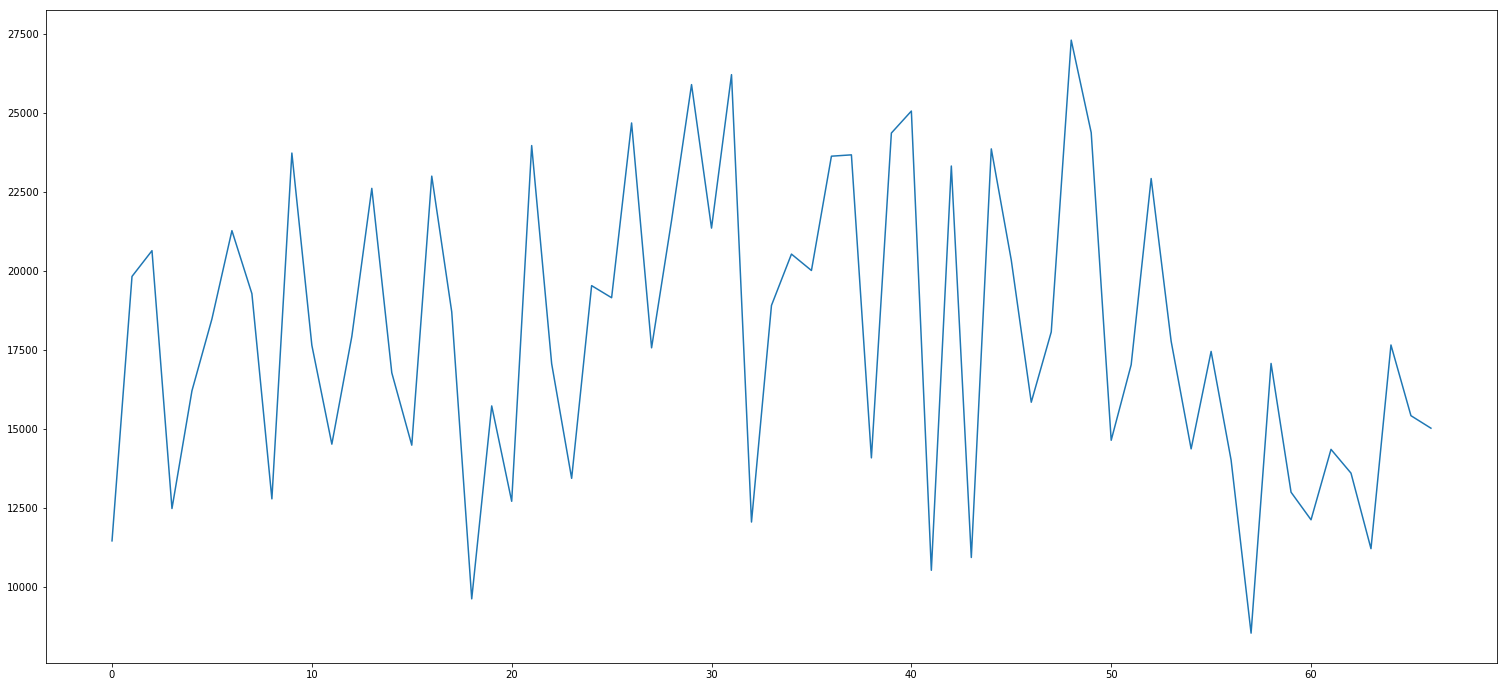

In [2]:
plt.figure(figsize=(26,12))
display(plt.plot(Number_of_white_pixels ) )

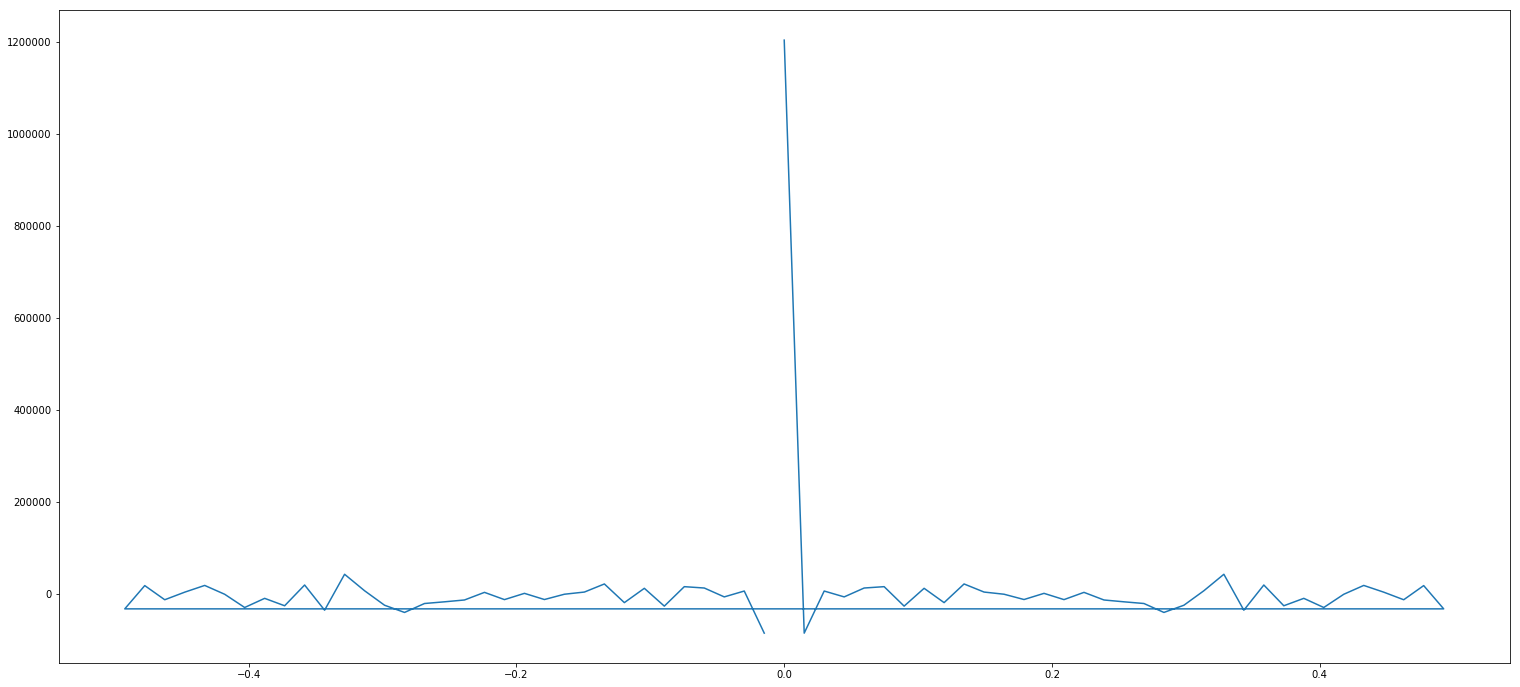

In [13]:
import matplotlib.pyplot as plt
t = np.array([11454, 19821, 20636, 12477, 16203, 18477, 21270, 19275, 12783, 23725, 17642, 14514, 17921, 22608, 16772, 14482, 22995, 18698, 9619, 15724, 12706, 23962, 17060, 13432, 19530, 19147, 24677, 17562, 21592, 25891, 21350, 26206, 12050, 18904, 20528, 20009, 23626, 23668, 14080, 24358, 25054, 10523, 23315, 10928, 23857, 20337, 15841, 18064, 27298, 24370, 14637, 17027, 22919, 17770, 14365, 17448, 14011, 8534, 17068, 12994, 12121, 14349, 13597, 11207, 17652, 15415, 15019])
sp = np.fft.fft(t)
freq = np.fft.fftfreq(t.shape[-1])
plt.figure(figsize=(26,12))
display(plt.plot(freq, sp.real))